In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataframe = pd.read_csv('/content/diabetes.csv')
print(dataframe.head())
print(dataframe.columns)
print(dataframe.dtypes)
dataframe.isnull().sum()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int6

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


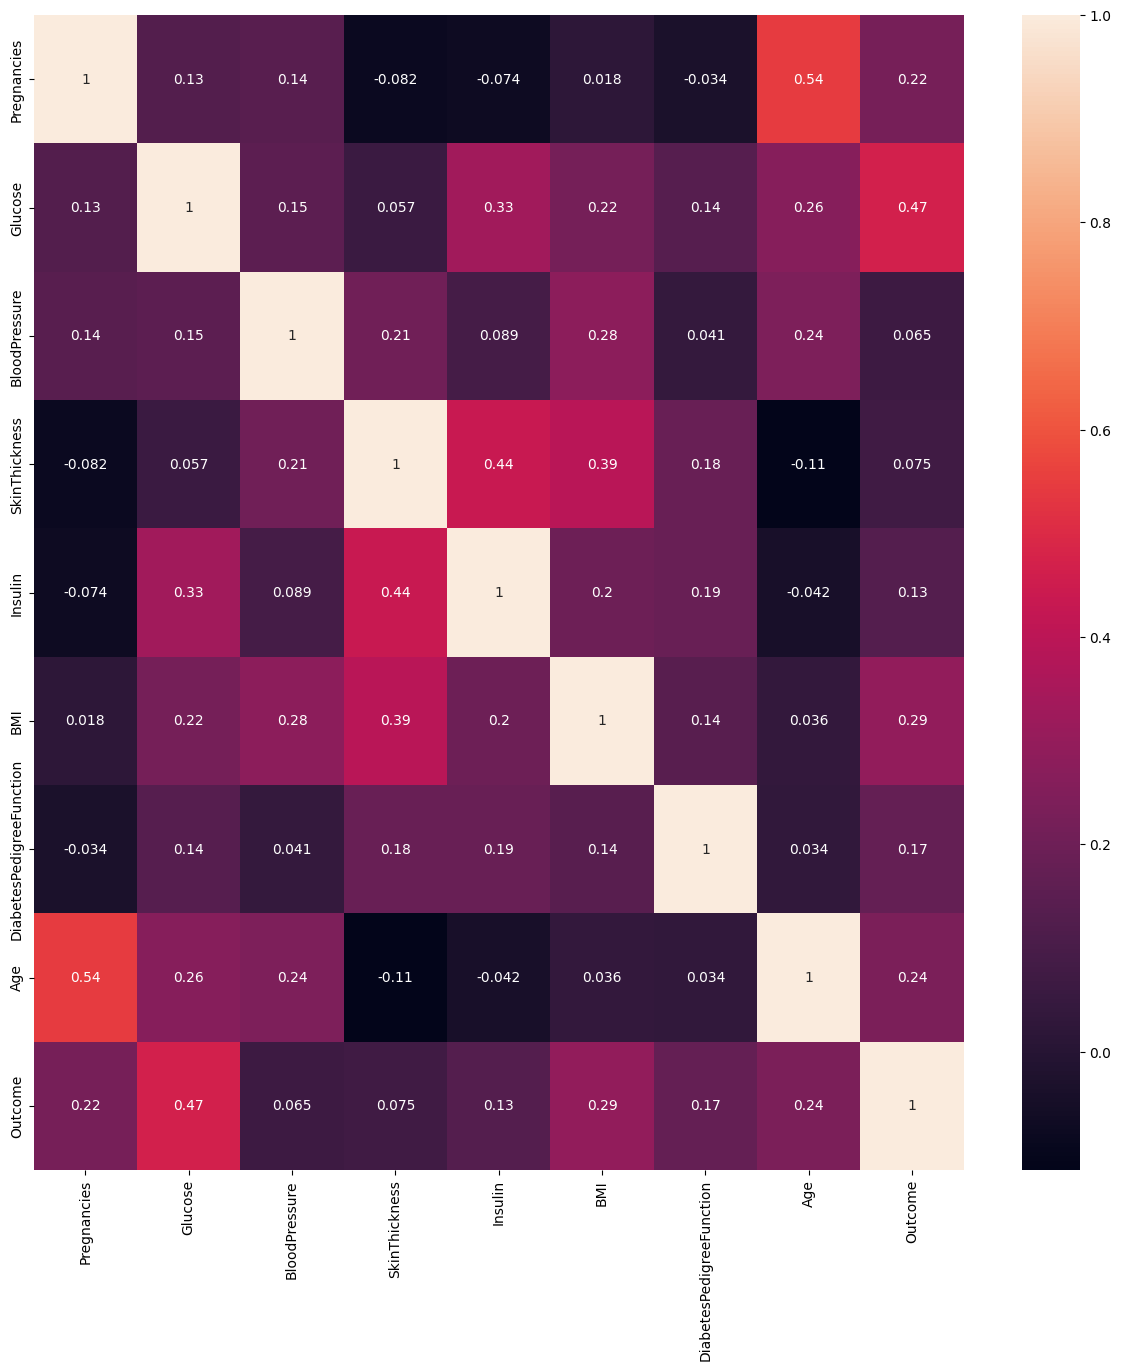

In [9]:
corr=dataframe.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(corr,annot=True)
plt.savefig('correlation_coefficient.jpg')
plt.show()

In [10]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


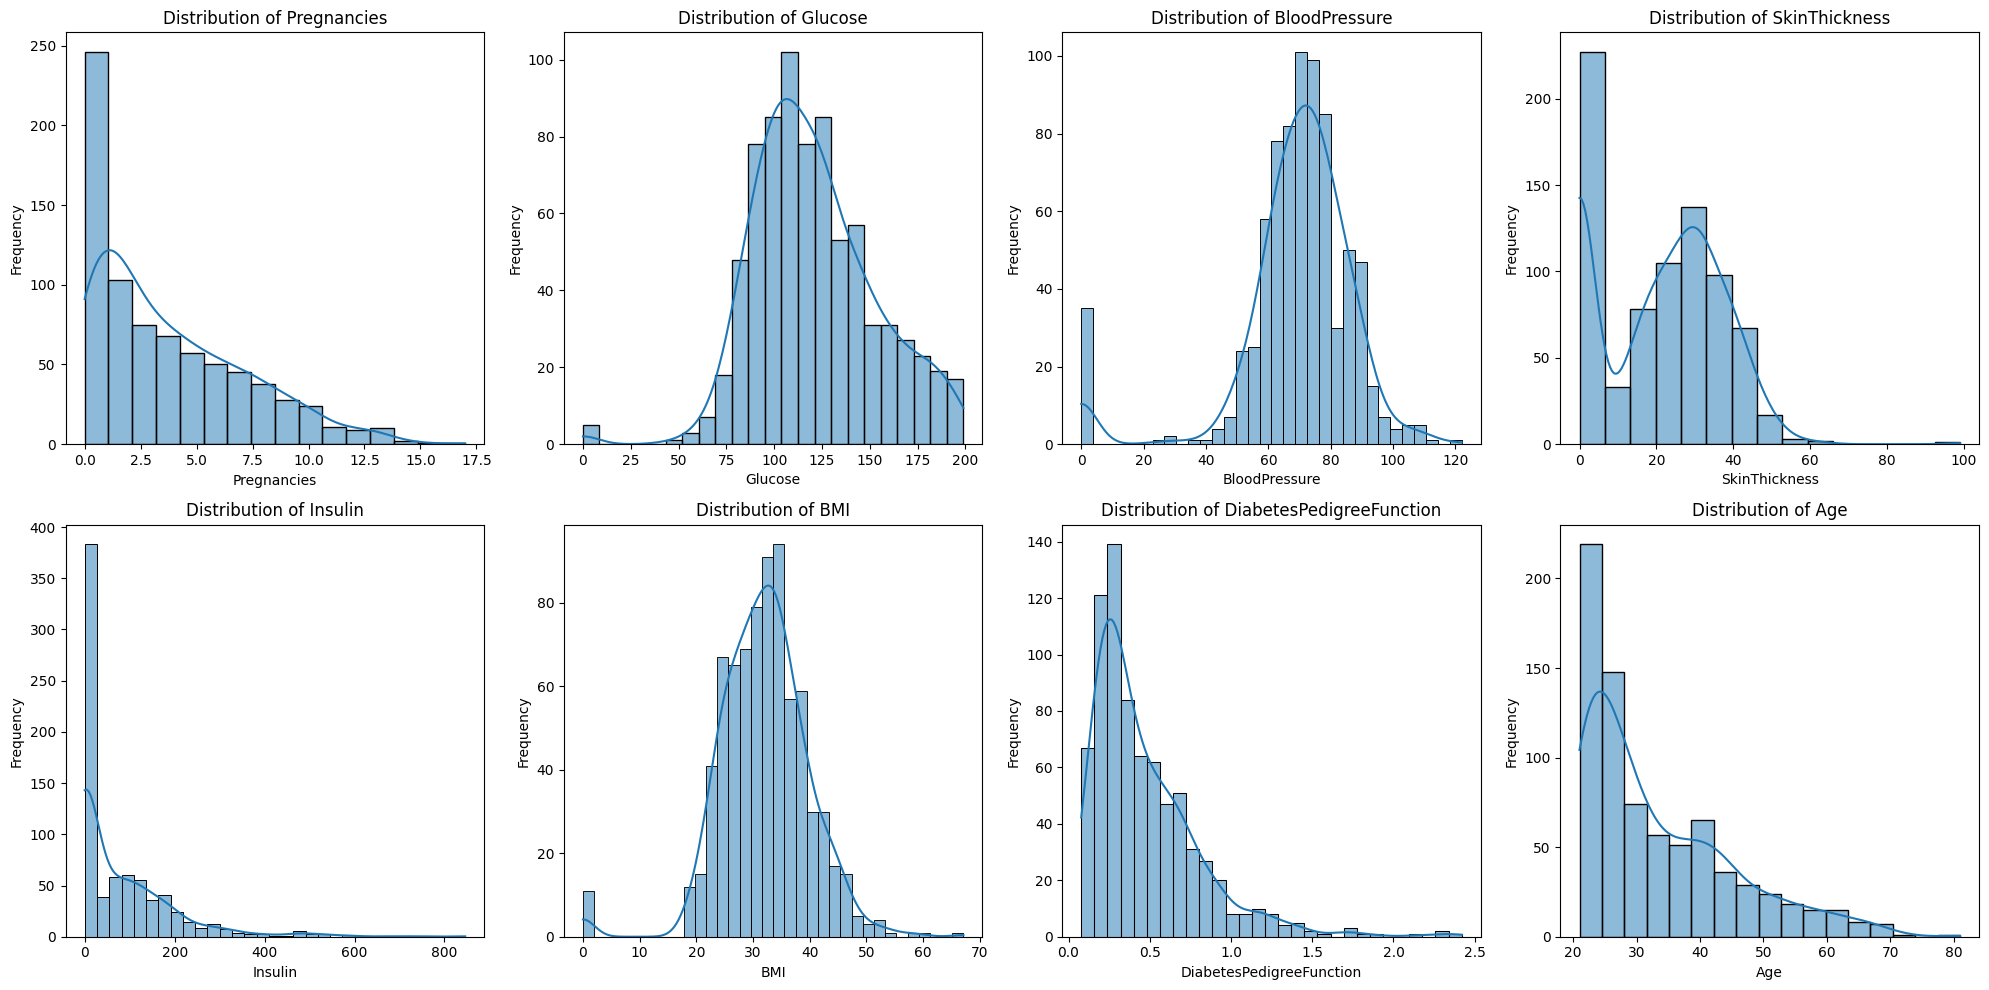

In [20]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creating subplots with a fixed grid size (3 rows, 3 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, feature in enumerate(features):
    sns.histplot(dataframe[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [27]:
for feature in dataframe.columns[:-1]:
    dataframe[feature]=dataframe[feature].replace(0,dataframe[feature].median())

In [33]:
from sklearn.preprocessing import StandardScaler
features_to_process = dataframe.columns[:-1]

# Calculating the 1st and 99th percentiles for each feature
percentiles = dataframe[features_to_process].quantile([0.01, 0.99])

# Filtering the dataframe to remove outliers
dataframe_cleaned = dataframe.copy()
for feature in features_to_process:
    lower_bound = percentiles.loc[0.01, feature]
    upper_bound = percentiles.loc[0.99, feature]
    dataframe_cleaned = dataframe_cleaned[(dataframe_cleaned[feature] >= lower_bound) & (dataframe_cleaned[feature] <= upper_bound)]

# Initializing the StandardScaler
scaler = StandardScaler()

# Fiting and transforming the features
dataframe_cleaned[features_to_process] = scaler.fit_transform(dataframe_cleaned[features_to_process])

print("Cleaned and normalized dataframe:")
display(dataframe_cleaned.head())
print("\nOriginal dataframe shape:", dataframe.shape)
print("Cleaned dataframe shape:", dataframe_cleaned.shape)
dataframe_cleaned['Outcome'].value_counts()

Cleaned and normalized dataframe:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.590208,0.907014,-0.028077,0.954926,-0.666963,0.221201,0.593809,1.527051,1
1,-1.122896,-1.266707,-0.564800,0.233730,-0.666963,-0.908602,-0.360092,-0.166564,0
2,1.275450,2.114637,-0.743708,-0.487465,-0.666963,-1.441223,0.749337,-0.077426,1
3,-1.122896,-1.128693,-0.564800,-0.487465,0.036510,-0.666501,-0.996026,-1.057940,0
5,0.247587,-0.197098,0.150831,-0.487465,-0.666963,-1.070002,-0.878516,-0.255701,0



Original dataframe shape: (768, 9)
Cleaned dataframe shape: (685, 9)


,count
Outcome,
0,445
1,240


In [38]:
from sklearn.model_selection import train_test_split
X = dataframe_cleaned.drop('Outcome', axis=1)
y = dataframe_cleaned['Outcome']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (458, 8)
X_test shape: (227, 8)
y_train shape: (458,)
y_test shape: (227,)


In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(X_train,y_train)
print(pd.Series(y_train).value_counts())

Outcome
0    298
1    298
Name: count, dtype: int64


In [41]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
regression.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_predictions=regression.predict(X_test)
print(y_predictions)

[1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1]


In [47]:
from sklearn.metrics import accuracy_score ,classification_report
accuracy_score(y_test,y_predictions)
target_names=['Non-Diabetic','Diabetic']
print(classification_report(y_test,y_predictions,target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.82      0.76      0.79       147
    Diabetic       0.61      0.70      0.65        80

    accuracy                           0.74       227
   macro avg       0.72      0.73      0.72       227
weighted avg       0.75      0.74      0.74       227



In [48]:
import pickle
pickle.dump(regression,open('Logistic_Regression_model.pkl','wb'))

# Task
Generate Python code for a Streamlit application that loads a pre-trained Logistic Regression model, takes user input for 8 features, preprocesses the input by scaling it using a pre-fitted StandardScaler, and displays the model's prediction.

## Install streamlit

### Subtask:
Install the Streamlit library in the Colab environment.


**Reasoning**:
The subtask is to install the Streamlit library. I will use the `pip install` command in a code cell to install the library.



In [49]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.6 MB/s eta 0:00:00


## Create streamlit app file

### Subtask:
Create a Python file that will contain the Streamlit app code.


**Reasoning**:
Create a new Python file named `app.py` and import the necessary libraries.



In [50]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

Writing app.py


## Load the model

### Subtask:
Write code in the Streamlit app file to load the saved Logistic Regression model.


**Reasoning**:
Load the saved Logistic Regression model using pickle.



In [51]:
regression = pickle.load(open('Logistic_Regression_model.pkl', 'rb'))